In [1]:
# 1

########## 14 June 2021 ###########
######### Alec Hirschauer #########
#
# In this notebook, we will be creating the LAMPTAB file(s)
# for the G130M 1291, 1300, 1309, 1318, and 1321 cenwaves at
# LP5, having created the LAMPTAB file for G140L/800 at LP3
# with an earlier version of this notebook (on 22 April 2021).
#
# The preamble from the older notebook contains the basic plan
# for working with the data, and basically I'll be copy+pasting
# the cells from that file to here, strategically replacing the
# G140L/800 @ LP3 specifics with the G130M @ LP5 specifics.
#
# Note that this is possible since, in the intervening time,
# new XTRACTAB files were generated which will allow us to extract
# the spectra at LP5 (these didn't exist yet beforehand).
#
# Elaine posted that these (preliminary) files are located at:
# /grp/hst/cos2/LP5_ERA/files_to_use/
# and are called "lp5_1dx.fits" and "lp3_1dx.fits".
#
# I don't know if I should use the LP3 file to re-do the LP3 LAMPTAB,
# but I'm guessing what I had already is probably okay,
# though it'll take testing the LAMPTAB I already made to be sure.
#
# (NOTE: I don't currently have access to the LP5_ERA directory, so I
# e-mailed Elaine to see if she can send me the "lp5_1dx.fits" file.)
#
# For now, I'll populate this notebook's cells and get as far as I can.


In [2]:
# 2

# The first thing we need to do is import the relevant packages.

import calcos
from astropy.io import fits
import glob
import numpy as np

# Obviously we'll need CalCOS to process the COS data, but also
# astropy's fits to handle the .fits files, glob (which allows for
# manipulating data with similar file names), and numpy to do some
# sorting of the data based on .fits file header information.


In [3]:
# 3

# In my directory with all my data, I want to specify only some files
# to work on, from the vast assortment of files (I downloaded both the
# raw files and the processed files; clearly all we really need here are
# the unprocessed, raw files).
#
# Set a variable called "rawtags" with glob to specify only the files in
# this working directory that have the word "rawtag" in it:

rawtags = glob.glob('*_rawtag_*.fits')


In [4]:
# 4

# From here, we can print out a list of the files set by the command above,

#print(rawtags)

# or print out the whole header of the first file (index[0]),

#fits.getheader(rawtags[0])

# but the next *useful* thing to do is set a consistent 'RANDSEED' value
# for every rawtag file, which will be used for important things later on.

for myfile in rawtags:
    fits.setval(myfile, 'RANDSEED', value=123456789)
    
# This dinky for loop takes all the files defined by "rawtags", then uses
# the astropy fits package to set a value for 'RANDSEED' to the very creative
# value of 123456789.
#
# (Note: "myfile" in this case specifies the very last file set by "rawtags".)


In [5]:
# 5

# We can print out the 'RANDSEED' value to show that the last command did its job,

#fits.getval(myfile, 'RANDSEED')

# but that's only if you really need to prove it to yourself.

# What we need to do now, as stipulated in the ISRs for similar work done, is to
# set the various fits header parameters to what they need to be for when we run
# them through CalCOS, in order for them to run the way we want them to.

for myfile in rawtags:
    fits.setval(myfile, 'FLATCORR', value='OMIT')
    fits.setval(myfile, 'WAVECORR', value='OMIT')
    fits.setval(myfile, 'TRCECORR', value='OMIT')
    fits.setval(myfile, 'ALGNCORR', value='OMIT')
    fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
    fits.setval(myfile, 'X1DCORR', value='PERFORM')
    fits.setval(myfile, 'BACKCORR', value='OMIT')
    fits.setval(myfile, 'FLUXCORR', value='OMIT')
    fits.setval(myfile, 'HELCORR', value='OMIT')
    fits.setval(myfile, 'GEOCORR', value='PERFORM')
    fits.setval(myfile, 'YWLKCORR', value='PERFORM')
    fits.setval(myfile, 'TEMPCORR', value='PERFORM')
    fits.setval(myfile, 'IGEOCORR', value='PERFORM')
    
# Confirm that these parameters are set properly before proceeding!
#
# We are running this all first for the G140L/800 data.
#
# ^ UPDATE: But now also for the G130M data!


In [6]:
# 6

# Next we need to specify the special lamp flash parameters to match what the
# observations are doing in the APT file, whereby the lamp is on for 30 seconds,
# then off for a while (how long and how many times depends on the exposure),
# so that it builds up signal without getting too hot, which could damage it.
#
# For the science exposures of G130M, the exposure times are 210 seconds, with
# 120 seconds of total lamp on time (four flashes), while for the science exposures
# of G140L, the exposure times are 450 seconds, with 240 seconds of total lamp
# time (eight flashes).
#
# Also note that, for the beginning of each Visit, there's a single long exposure
# to settle the OSM, which is 1440 seconds for the two G130M Visits, but 1800 seconds
# for the single G140L Visit.
#
# We'll set this with a large "if" statement written be Elaine, which sets parameters
# like lamp duration (LMPDUR1), the start time of a flash (LMP_ON1), the end time of
# a flash (LMPOFF1), and the median time of that flash (LMPMED1).
#
# For each kind of exposure, we define this for two flashes, then note the number of
# flashes (NUMFLASH), and how to continue the pattern (set TAGFLASH to 'UNIFORMLY SPACED').
#
# Finally, note at what extension each of these parameters should be set to.

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=4, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) > 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=12, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=8, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) > 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=15, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)

# It may not be the most elegant code, but it'll do the job just fine!


In [7]:
# 7

# The next step in the process is to actually run CalCOS on the data.
#
# First, to account for a weird idiosyncrasy whereby CalCOS automatically
# processes rawtag_b files after running on rawtag_a files, then crashes when
# it sees rawtag_b files that have already been processed, let's define
# a new grouping of files that are all the rawtag_a files alone:
#
# ^ UPDATE: I think I can keep this code the same as earlier, since the
# crash with the rawtag_b files will happen whether I'm actually needing them
# or not (with G140L/800, we only needed Segment A, but for the G130M,
# we'll need both Segment A and Segment B).

rawtagsa = glob.glob('*_rawtag_a.fits')

# Now we can run CalCOS on our data, outputting to a new directory made
# to keep things clean (pick your own directory path):
#
# ^ UPDATE: I've made a new output directory that's less ambiguous (output_G130M_14June2021).

#for myfile in rawtagsa:
#    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021')

# Be aware that, if you're running this all locally, this step will take a decent
# amount of time (15-20 minutes, maybe).
#
# So I'm commenting it out now for if/when I have to re-run the whole notebook.


In [8]:
# 8

# Output from CalCOS will be used to make the interim LampTab.
#
# NB, since WAVECORR is set to OMIT, the LAMP parameters from Cell #6
# aren't going to be used, but we'll need it later when we run CalCOS again
# later on.
#
# Import the python routines that Elaine sent to me:

from make_interim_lamptab import *
#from common_correlation_tasks import *
from updating_lamptab import *

# Removed the bottom two because they're already called by the first one,
# and we were getting errors like crazy (actually just the middle one).


In [9]:
# 9

### lampdataLP3 = '52j2110ml_lamp.fits'
lampdataLP4 = '2bj2256ol_lamp.fits'

# ^ This is the file we're updating to make our interim file.
# ^ UPDATE: This is the LP4 LAMPTAB file that we're going to modify
#
# We'll use the x1d file we made in CalCOS and pull out the array of the first flash.
#
# A .fits file, can be x1d sum or x1d singular
# difference: DQ (data quality, e.g., gain sag holes, etc.)
# sum has all FP-POS summed to it, a single exposure does not
#
# examples: wavelength column, flux column, net count rate (background subtracted)
# gross counts column, gcount (gross, but count rate), etc.
#
# This is what's put into the intensity array of the lamptab file.
# First flash so it's not blurred by drift.
# Actually we're using the x1d file, which is the combined flashes,
# which if it has any drift this will be blurred around.
# But since it's only the interim file, maybe this doesn't matter so much?
# Also note that, there shouldn't be a lot of drift since we took the
# single long exposure at the beginning of each Visit.

x1ds = glob.glob('/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021/*_x1d.fits')

# This globs all the x1ds from the output directory, but now we need to
# exclude the x1ds that were a part of the long OSM-settling exposure(s).
# Also, we want to exclude the G140L/800 exposures as well.

print(len(x1ds))

# ^ This should give me 27 files, but I'm getting zero.
# ^ UPDATE: That's because I had a typo in the directory, -> fixed!

x1ds_G130M = []
for myfile in x1ds:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        x1ds_G130M.append(myfile)
        
print(len(x1ds_G130M))

# ^ This gave us four for G140L/c800 which was the number of FP-POSs for Segment A.
# Not sure what I should get for G130M.
# UPDATE: I got zero, which isn't good... not sure what to do here.
# ^ UPDATE! I had been getting zero because I had a typo in the output directory.
# We actually have 27 total "*_lamp.fits" files, 20 of which have 'EXPTIME' < 1000, meaning
# that they don't originate from the long, OSM-settling exposure to start each sequence.
#
# I'm not sure 20 is the number I'm looking for, but it's what I got.


27
20


In [10]:
# 10

# Make the interim lamptab...

newlamptab = '14June2021_interim_lamp.fits'

# We'll use one of the functions contained within "updating_lamptab.py".

makelamptemplatefile(newlamptab, lampdataLP4, x1ds_G130M)

# This should write out a new file for me.
#
# The third number here isn't in the order that I would have expected,
# but glob does its thing in random order, so that's what's up.
# Also, "makelamptemplatefile" was imported from one of the routines
# that's done in Cell #8.
#
# Optical Element, Cenwave, FP offset (offset from FP-POS = 3), Exptime


G130M 1309 1 209.888
G130M 1327 -2 209.952
G130M 1291 -2 209.888
G130M 1309 -2 209.856
G130M 1318 -1 209.92
G130M 1300 -2 210.016
G130M 1291 1 209.952
G130M 1327 1 209.952
G130M 1318 0 209.92
G130M 1309 0 209.952
G130M 1309 -1 209.568
G130M 1291 -1 209.76
G130M 1300 -1 209.952
G130M 1291 0 209.952
G130M 1327 0 209.984
G130M 1300 0 210.016
G130M 1318 -2 209.952
G130M 1327 -1 209.888
G130M 1300 1 209.888
G130M 1318 1 209.856


800
565.0 451.0


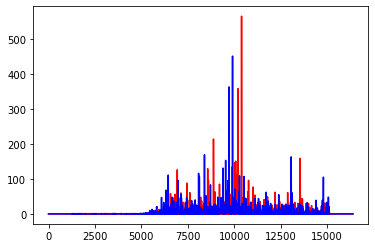

CORRELATING 0 vs -2 Shift: -485.1040681539416
saved interim_FP_shifts_NOdrift_14June2021.txt
800 FUVB no data to shift
565.0 605.0


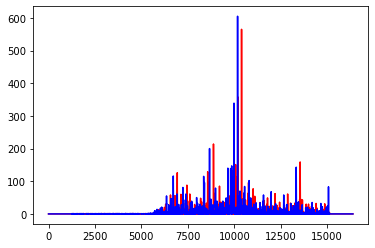

CORRELATING 0 vs -1 Shift: -214.0634501637578
saved interim_FP_shifts_NOdrift_14June2021.txt
800 FUVB no data to shift
565.0 606.0


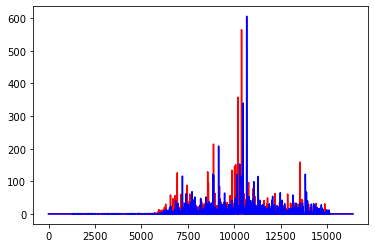

CORRELATING 0 vs 1 Shift: 277.24115310238994
saved interim_FP_shifts_NOdrift_14June2021.txt


800 FUVB no data to shift
1055
1096
1105
1222
1230
1280
1291
1300
1309
1318
1327
1533
107.0 97.0


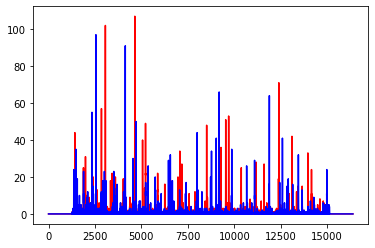

CORRELATING 0 vs -2 Shift: -511.38975830160416
saved interim_FP_shifts_NOdrift_14June2021.txt
233.0 248.0


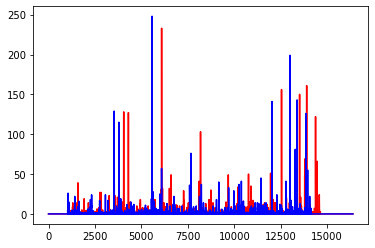

CORRELATING 0 vs -2 Shift: -512.7503466331691
saved interim_FP_shifts_NOdrift_14June2021.txt


107.0 111.0


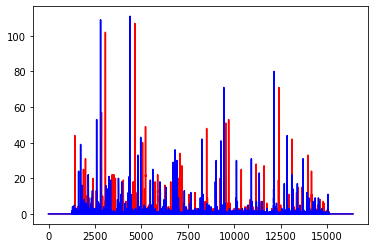

CORRELATING 0 vs -1 Shift: -258.88262924848823
saved interim_FP_shifts_NOdrift_14June2021.txt


233.0 217.0


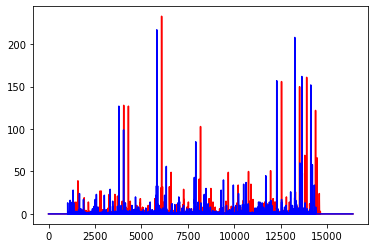

CORRELATING 0 vs -1 Shift: -258.9574283735419
saved interim_FP_shifts_NOdrift_14June2021.txt


107.0 99.0


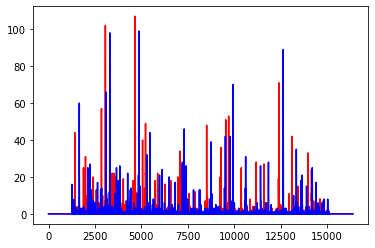

CORRELATING 0 vs 1 Shift: 235.75733130132903
saved interim_FP_shifts_NOdrift_14June2021.txt
233.0 266.0


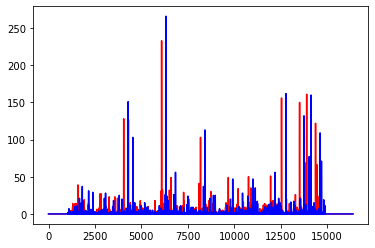

CORRELATING 0 vs 1 Shift: 236.86762622772403
saved interim_FP_shifts_NOdrift_14June2021.txt
1577
1589
1600
1611
1623
800


800 -2 FUVA -485.1040681539416
No shift for 800/-2/FUVB
800 -1 FUVA -214.0634501637578
No shift for 800/-1/FUVB
800 1 FUVA 277.24115310238994
No shift for 800/1/FUVB
1533
1533 -2 FUVA -511.38975830160416
1533 -2 FUVB -512.7503466331691
1533 -1 FUVA -258.88262924848823
1533 -1 FUVB -258.9574283735419
1533 1 FUVA 235.75733130132903
1533 1 FUVB 236.86762622772403


In [11]:
# 11

# Define a name for a .txt save file.

save_file = 'interim_FP_shifts_NOdrift_14June2021.txt'
find_fp_pix_shift(newlamptab, save_file)

# This routine is in the "make_interim_lamptab" routine.
# Saves new pixel shifts into .txt file, then we'll update the Lamp Tab file one more time
# to update those positions.

update_lamptab(save_file, newlamptab)


In [12]:
# 12

# What we have above are lamp tab plots which show in red the FP-POS=3 spectrum,
# and compared with that are the blue spectra of FP-POS=1, 2, & 4.
#
##########
#
# UPDATE: I'm not certain what specifically each of the above plots is depicting,
# since unlike the last notebook I'm working with more than one single grating/cenwave
# in this LAMPTAB file (it's one grating, but five cenwaves)>
# 
# Furthermore, the routine "updating_lamptab.py" specifies cenwaves
# 800, 1105, and 1280,
# and so I wonder if what we're seeing here are the three plots of
# FP-POS=1, 2, & 4 vs. FP-POS=3 for each of those three cenwaves,
# noting that none of them are what I'm actually looking for.
#
# Maybe I have to re-write Camellia's routine to be applicable to this?
#
##########
#
# Also note the values of the pixel shifts.
#
# Now let's compare the old and the new with fits diff.

#!fitsdiff 2bj2256ol_lamp.fits 14June2021_interim_lamp.fits

# ^ Comment out running this check again in case I re-run the cell.

# Sanity check that the file was updated properly!


In [13]:
# 13

# Next up is to run CalCOS again!

# Changing WAVECORR to PERFORM, but everything else is the same
# from when we did this earlier.
# But also at the end, specify the new interim lamp tab file.
# Also, note that we're not changing the extract tab,
# we're using the LP3 extract tab which for cenwave 800
# has the 1105 entries.
# And we're not changing the disptab.
# Currently using LP3 disptab which has the LP4 disptab entries for c800.
#
# What is extract tab?
# has extraction region used for boxcar extraction
# rows for every grating/cenwave, segment, and aperture
# for a cenwave 800 extract tab,
# rows for all the various parameters,
# where is the spectrum landing on the detector?
# also things like slope of extraction region
# check out detector training for more details

for myfile in rawtags:
    fits.setval(myfile, 'FLATCORR', value='OMIT')
    fits.setval(myfile, 'WAVECORR', value='PERFORM')
    fits.setval(myfile, 'TRCECORR', value='OMIT')
    fits.setval(myfile, 'ALGNCORR', value='OMIT')
    fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
    fits.setval(myfile, 'X1DCORR', value='PERFORM')
    fits.setval(myfile, 'BACKCORR', value='OMIT')
    fits.setval(myfile, 'FLUXCORR', value='OMIT')
    fits.setval(myfile, 'HELCORR', value='OMIT')
    fits.setval(myfile, 'GEOCORR', value='PERFORM')
    fits.setval(myfile, 'YWLKCORR', value='PERFORM')
    fits.setval(myfile, 'TEMPCORR', value='PERFORM')
    fits.setval(myfile, 'IGEOCORR', value='PERFORM')
    fits.setval(myfile, 'LAMPTAB', value='14June2021_interim_lamp.fits')

# Because I'm setting the same set of files to calibrate, because I'm setting the
# lamptab here, it changes the default for if/when I try to run this again
# from the start.


In [14]:
# 14

# We're running CalCOS again, so let's make a new directory to put the output.
#
# And here we're just grabbing all the cenwave 800 rawtags (they're only Segment A).

rawtags_G130M = []
for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        rawtags_G130M.append(myfile)
        
for myfile in rawtags_G130M:
    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2')

# ^ Comment out running CalCOS again in case I re-run the cell, since it takes forever.


CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 14-Jun-2021 17:40:57 EDT
Input file = leih01g5q_rawtag_a.fits
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 14-Jun-2021 17:40:59 EDT
Input     leih01g5q_rawtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g5q_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g5q_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g5q_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g5q_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1300, FPOFFSET 

DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.6  30.6  30.0  15.8
2:  60.6  90.6  30.0  75.8
3:  120.6  150.6  30.0  135.8
4:  180.6  210.0  29.4  195.8
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -------   -------------     -------------------------  ----------
 1 FUVA      58.9 (649.3)     304.4 2.11 [  0.1]  304.3  2892.2 (2650)
 2 FUVA      58.9 (649.3)     304.2 2.19 [ -0.1]  304.3  2661.7 (2653)
 3 FUVA      58.9 (649.4)     304.1 2.16 [ -0.1]  304.3  2847.7 (2652)
 4 FUVA      59.1 (649.6)     304.4 2.33 [  0.1]  304.3  2751.6 (2653)
LAMPUSED = NONE, which is incorrect; the value will be reset to P1.
HELCO

Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01gaq_x1d_a.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 588.54 vs. nominal y = 588.13
    error estimate for y location = 10.83, FWHM = 4.98
Spectrum will be extracted at y = 588.13

TIME-TAG calibration -- 14-Jun-2021 17:43:12 EDT
Input     leih01gaq_rawtag_b.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01gaq_corrtag_b.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01gaq_flt_b.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01gaq_counts_b.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-20

DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.7  30.7  30.0  15.1
2:  60.7  90.5  29.8  75.8
3:  120.7  150.5  29.8  135.1
4:  180.7  209.9  29.2  195.3
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -------   -------------     -------------------------  ----------
 1 FUVB      61.9 (708.8)    -166.9 2.52 [  0.2] -167.2  1989.0 (1867)
 2 FUVB      61.9 (708.7)    -167.1 2.33 [  0.1] -167.2  1913.6 (1862)
 3 FUVB      62.1 (708.9)    -167.3 2.11 [ -0.1] -167.2  1975.5 (1864)
 4 FUVB      62.0 (708.9)    -167.3 2.26 [ -0.1] -167.2  2018.0 (1868)
LAMPUSED = NONE, which is incorrect; the value will be reset to P1.
HELCO

Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02c0q_x1d_b.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 646.15 vs. nominal y = 646.03
    error estimate for y location = 8.07, FWHM = 4.82
Spectrum will be extracted at y = 646.03
End   14-Jun-2021 17:44:56 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 14-Jun-2021 17:44:56 EDT
Input file = leih01fbq_rawtag_b.fits
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 14-Jun-2021 17:44:58 EDT
Input     leih01fbq_rawtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/out

OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01ezq_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1291, FPOFFSET -1
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.fits
GEOCORR   PERFORM
GEOFILE = lref$x1u1459gl_geo.fits
IGEOCORR  PERFORM
DGEOCORR  OMIT
XWLKCORR  PERFORM
XWLKFILE= lref$14o2013ql_xwalk.fits
YWLKCORR  PERFORM
YWLKFILE= lref$14o2013rl_ywalk.fits
DEADCORR  PERFORM
DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.7  30.7  30.0  15.4
2:  60.7  90.7  30.0  75.5
3:  120.7  150.7  30.0  136.1
4:  180.7  210.0  29.4  1

HELCORR   OMIT for computing wavelengths for the corrtag table
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
STATFLAG  T
Append a TIMELINE extension.

Spectral Extraction -- 14-Jun-2021 17:46:47 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01f6q_flt_a.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01f6q_counts_a.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01f6q_x1d_a.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 590.33 vs. nominal y = 589.69
    error estimate for y location = 1

OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02c8q_lampflash_b.fits
DETECTOR  FUV, segment B
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1327, FPOFFSET -2
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.fits
GEOCORR   PERFORM
GEOFILE = lref$x1u1459gl_geo.fits
IGEOCORR  PERFORM
DGEOCORR  OMIT
XWLKCORR  PERFORM
XWLKFILE= lref$14o2013ql_xwalk.fits
YWLKCORR  PERFORM
YWLKFILE= lref$14o2013rl_ywalk.fits
DEADCORR  PERFORM
DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.7  30.5  29.8  16.0
2:  60.7  90.7  30.0  75.8
3:  120.7  150.5  29.8  136.0
4:  180.5  209.9  29.4  1

HELCORR   OMIT for computing wavelengths for the corrtag table
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
STATFLAG  T
Append a TIMELINE extension.

Spectral Extraction -- 14-Jun-2021 17:48:31 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01euq_flt_b.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01euq_counts_b.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01euq_x1d_b.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 647.45 vs. nominal y = 647.61
    error estimate for y location = 4

    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 14-Jun-2021 17:49:14 EDT
Input     leih02bdq_rawtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02bdq_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02bdq_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02bdq_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02bdq_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1309, FPOFFSET 0
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.fits
GEOCORR   PERFORM
GEOFILE = lref$x1u1459gl_geo.fits
IGEOCORR  PERFORM
DGEOCORR  OMIT
XWLKCORR  PERFORM
XWLKFILE= lref$14o2013ql_xwalk.fits
YWLKCORR  PE

2:  60.6  90.6  30.0  75.3
3:  120.6  150.6  30.0  135.6
4:  180.6  210.0  29.4  195.2
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -------   -------------     -------------------------  ----------
 1 FUVA      59.3 (648.8)    -150.9 2.04 [  0.1] -150.9  2744.2 (2643)
 2 FUVA      59.3 (648.8)    -150.9 2.12 [  0.1] -150.9  2839.6 (2639)
 3 FUVA      59.3 (648.8)    -151.0 1.94 [ -0.1] -150.9  2741.5 (2639)
 4 FUVA      59.4 (648.8)    -150.9 2.09 [ -0.0] -150.9  2804.7 (2648)
LAMPUSED = NONE, which is incorrect; the value will be reset to P1.
HELCORR   OMIT for computing wavelengths for the corrtag table
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
STATFLAG  T
Append a TIMELINE extension.

Spectral Extraction -- 14-Jun-2021 17:50:14 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2

BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 588.27 vs. nominal y = 588.13
    error estimate for y location = 18.14, FWHM = 5.19
Spectrum will be extracted at y = 588.13

TIME-TAG calibration -- 14-Jun-2021 17:50:59 EDT
Input     leih01geq_rawtag_b.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01geq_corrtag_b.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01geq_flt_b.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01geq_counts_b.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01geq_lampflash_b.fits
DETECTOR  FUV, segment B
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1309, FPOFFSET -1
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.f

lamp on, off, duration, median time:
1:  0.7  30.7  30.0  15.7
2:  60.7  90.7  30.0  76.0
3:  120.5  150.7  30.2  135.6
4:  180.7  210.0  29.3  195.7
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -------   -------------     -------------------------  ----------
 1 FUVB      61.2 (707.9)    -179.3 2.21 [  0.4] -179.7  2371.1 (2270)
 2 FUVB      61.2 (707.9)    -179.7 2.01 [  0.1] -179.7  2377.6 (2283)
 3 FUVB      61.2 (707.9)    -179.9 2.06 [ -0.2] -179.7  2321.6 (2273)
 4 FUVB      61.1 (707.8)    -179.9 1.98 [ -0.2] -179.7  2479.2 (2268)
LAMPUSED = NONE, which is incorrect; the value will be reset to P1.
HELCORR   OMIT for computing wavelengths for the corrtag table
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
STATFLAG  T
Append a TIMELINE extension.

Spectral Extraction -- 14-Jun-2021

DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 645.41 vs. nominal y = 645.47
    error estimate for y location = 6.83, FWHM = 4.56
Spectrum will be extracted at y = 645.47
End   14-Jun-2021 17:52:46 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 14-Jun-2021 17:52:46 EDT
Input file = leih01g8q_rawtag_a.fits
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.
Info:  aperture plate is offset by 65.08 pixels
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 14-Jun-2021 17:52:47 EDT
Input     leih01g8q_rawtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g8q_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih01g8q_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahi

APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.fits
GEOCORR   PERFORM
GEOFILE = lref$x1u1459gl_geo.fits
IGEOCORR  PERFORM
DGEOCORR  OMIT
XWLKCORR  PERFORM
XWLKFILE= lref$14o2013ql_xwalk.fits
YWLKCORR  PERFORM
YWLKFILE= lref$14o2013rl_ywalk.fits
DEADCORR  PERFORM
DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.7  30.7  30.0  15.7
2:  60.7  90.7  30.0  75.4
3:  120.7  150.7  30.0  135.6
4:  180.7  210.0  29.4  195.3
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -------   -------------     -------------------------  ----------
 1 FUVA      59.0 (650.3)

GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
STATFLAG  T
Append a TIMELINE extension.

Spectral Extraction -- 14-Jun-2021 17:54:30 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02chq_flt_a.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02chq_counts_a.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2/leih02chq_x1d_a.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 587.11 vs. nominal y = 587.24
    error estimate for y location = 15.02, FWHM = 4.81
Spectrum will be extracted at y = 587.24

TIME-TAG calibration -- 14-Jun-2021 17:54:31 EDT
Input     leih02chq_rawtag_b.fits
OutTag    /Users/a

DETECTOR  FUV, segment B
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1318, FPOFFSET 0
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  PERFORM
RANDSEED = 123456789
TEMPCORR  PERFORM
BRFTAB  = lref$x1u1459il_brf.fits
GEOCORR   PERFORM
GEOFILE = lref$x1u1459gl_geo.fits
IGEOCORR  PERFORM
DGEOCORR  OMIT
XWLKCORR  PERFORM
XWLKFILE= lref$14o2013ql_xwalk.fits
YWLKCORR  PERFORM
YWLKFILE= lref$14o2013rl_ywalk.fits
DEADCORR  PERFORM
DEADTAB = lref$s7g1700gl_dead.fits
PHACORR   PERFORM
PHATAB  = lref$wc318317l_pha.fits
DOPPCORR  OMIT
FLATCORR  OMIT
WAVECORR  PERFORM
Process tagflash wavecal
WCPTAB  = lref$u1t1616ql_wcp.fits
LAMPTAB = 14June2021_interim_lamp.fits
XTRACTAB= lref$x1v17414l_1dx.fits
DISPTAB = lref$xaa18189l_disp.fits
lamp on, off, duration, median time:
1:  0.7  30.7  30.0  15.8
2:  60.7  90.5  29.8  75.3
3:  120.7  150.7  30.0  135.6
4:  180.7  210.0  29.3  195.2
  segment    cross-disp           dispersion direction
            shift (locn)      shift err  [orig.]    FP   chi sq (n)
  -

RuntimeError: output files already exist

In [ ]:
# 15

# We're now looking at the python routine called
# "removedriftfromwavecorr.py"
# and Elaine is explaining what it does:
#
# First, set up where everything's going to go.

corrdir = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_G130M_14June2021_2'
outputdir = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/G130M_corrtags_deshifted'
calcosout = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/G130M_x1ds_deshifted'

import os
from removedriftfromwavecorr import *

lffiles = glob.glob(os.path.join(corrdir, '*lampflash.fits'))

# Copy+Paste from Camellia's code:

for lampflash in lffiles:
        
# open the lampflash file and grab the data and header
    with fits.open(lampflash) as df:
        lampdata = df[1].data
        lamphead = df[0].header

    cenwave = lamphead['cenwave']
    fppos = lamphead['fppos']

        # open the lamptab file and grab the data
        # this should be the interim lamptab file
    lamptab = '14June2021_interim_lamp.fits'#HERE
    with fits.open(lamptab) as lt:
        ltdata = lt[1].data

    for segment in ['FUVA', 'FUVB']:
        if (cenwave == 800) or (cenwave == 1533):
            if (cenwave == 800) & (segment == 'FUVB'):
                continue


            shifts = lampdata[np.where(lampdata['segment'] == segment)]['SHIFT_DISP']

            wh_lt = np.where((ltdata['segment'] == segment) &
                             (ltdata['cenwave'] == cenwave) &
                             (ltdata['fpoffset'] == fppos-3) )
            fp_pixel_shift = ltdata[wh_lt]['fp_pixel_shift'][0]

            subshifts = shifts - fp_pixel_shift
            finalshifts = np.array([x - subshifts[0] for x in subshifts[1:]])

            print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
            print('shifts found for {} {} {} = {}'.format(cenwave, fppos, segment, finalshifts))

            # if any shifts are greater than 1 pixel, remove the drift

            # if np.any(abs(finalshifts) > 1.0):

            print('correcting xcorr....')
            info, xcorr, ycorr, time = get_corrtag_info(corrdir, lampflash, segment)

            # blocks are in the format [time_on, time_off] for a single setting from the lampflash
            blocks = make_time_blocks_sec(lampflash, info)
            print(blocks)

            newxcorr = correct_xcorr_drift(time, xcorr, blocks, finalshifts)
            newcorrtagfile = write_new_corrtag(corrdir, lampflash, newxcorr, outputdir, segment)

            # else:
            #     print('no correction done')
            #     oldcorrtagfile = get_corrtag_filename(datadir, lampflash, segment)
            #     copy_xfull(oldcorrtagfile, outputdir)

newcorrtags = glob.glob(os.path.join(outputdir, '*corrtag*'))

for newcorrtag in newcorrtags:
    fits.setval(newcorrtag, 'WAVECORR', value='OMIT')

newcorrfilesa = [x for x in newcorrtags if 'corrtag_b' not in x]

for newcorrtaga in newcorrfilesa:
    make_new_x1ds(newcorrtaga, calcosout)
                    
# (Get error below because I'm trying to re-run CalCOS on data
# that's already been CalCOSed.)
